# Shaple value tutorial

In the methods for the explanability and interpretibility of machine learning models, shapley-value based methods are one commonly used class with theoretical guarantee. In this tutorial, we will mainly focus on the package SHAP and  
1. reimplement the simplified Kernel SHAP for understanding how it works and how to use the package for applications;
2. apply Kernel SHAP to explaining the results of a neural network in a regression task;
3. apply Kernel SHAP to the results of sklearn models on the iris dataset;
4. apply Kernel SHAP to explaining the sentiment analysis results.

The tutorial is mainly adapted from the official documents of [flax](https://flax.readthedocs.io/en/latest/notebooks/flax_basics.html) and [shap](https://github.com/slundberg/shap#citations). 

After finishing 3 and 4, one can be able to apply shap to applications. A complete of 3 and 4 can be awarded with the basic points.

After finishing 1 and 2, one can be able to understand the basics of Kernel SHAP and build neural networks with flax. A complete of 1 and 2 can be awarded with bonus.

## Install shap package
The [shap package](https://github.com/slundberg/shap) is in general based on the work   
* [Lundberg, Scott M., and Su-In Lee. "A unified approach to interpreting model predictions." Proceedings of the 31st international conference on neural information processing systems. 2017.](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf)

In [ ]:
!pip install shap

## PART I: Kernel SHAP
In this tutorial, we focus on Kernel SHAP which approximates shapely values. The computation mehtods has been introduced in Theorem 2 of [(Lundberg, Scott M., and Su-In Lee, 2017)](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf).
Interestingly, one can implement the method with weighted linear regression. In this part,
* We first apply Kernel SHAP in shap to a simple linear function;
* We then reimplement Kernel SHAP from scratch and compare the result with Kernel SHAP in shap;
* Finally, we build a neural network for a simple (non)-linear regression task and apply Kernel SHAP to explain its results.


### Kernel SHAP for linear functions

* Input $\mathbf{x}_i$ is a four-dimensional vector;
* The unknown function is $f(\mathbf{x}_i) = \mathbf{\beta} \cdot \mathbf{x}_i + 10$, where $\beta$ and $10$ are the function parameters.

In [1]:
import numpy as np
import shap

In [2]:
M = 4
np.random.seed(1)
x = np.random.randn(M)
def f(X):
    np.random.seed(0)
    beta = np.random.rand(X.shape[-1])
    return np.dot(X,beta) + 10
f(x)

9.55093584213122

### Create a explainer with Kernel SHAP in shap
Please fill in this code block to create a explainer with kernel SHAP in [the shap package](https://github.com/slundberg/shap#citationshttps://github.com/slundberg/shap#citations).

In [ ]:
# explainer = ...

In [3]:
######### Answer #########
reference = np.zeros(M)
explainer = shap.KernelExplainer(f, np.reshape(reference, (1, len(reference))))
######### End #########

Please fill in this code block to print the shap values for explaining the $f(\mathbf{x}_i)$ where the input $\mathbf{x}_i$ and the function parameters $\beta$ are randomly generated.

In [ ]:
# shap_values = ...

print("shap_values =", shap_values)
print("base value =", explainer.expected_value)

In [4]:
######### Answer #########
shap_values = explainer.shap_values(x)
print("shap_values =", shap_values)
print("base value =", explainer.expected_value)
######### End #########

shap_values = [ 0.89146267 -0.43752168 -0.31836259 -0.58464256]
base value = 10.0


### Implement Kernel SHAP with weighted linear regression

Please reimplement Kernel SHAP from scratch. You may need to consider Theorem 2 of [(Lundberg, Scott M., and Su-In Lee, 2017)](https://papers.nips.cc/paper/2017/file/8a20a8621978632d76c43dfd28b67767-Paper.pdf).

In [ ]:
#### Please finish the function ####
def kernel_shap(...):
    ...
    return base_value, shap_values
#### END ####

M = 4
np.random.seed(1)
x = np.random.randn(M)

#### Call the function ####
phi = kernel_shap(...)
#### END ####

base_value = phi[-1]
shap_values = phi[:-1]

print("  reference =", reference)
print("          x =", x)
print("shap_values =", shap_values)
print(" base_value =", base_value)
print("   sum(phi) =", np.sum(phi))
print("       f(x) =", f(x))

In [5]:
######### Answer #########
import scipy.special
import itertools

def powerset(iterable):
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

def shapley_kernel(M,s):
    if s == 0 or s == M:
        return 10000
    return (M-1)/(scipy.special.binom(M,s)*s*(M-s))


def kernel_shap(f, x, reference, M):
    X = np.zeros((2**M,M+1))
    X[:,-1] = 1
    weights = np.zeros(2**M)
    V = np.zeros((2**M,M))
    for i in range(2**M):
        V[i,:] = reference

    ws = {}
    for i,s in enumerate(powerset(range(M))):
        s = list(s)
        V[i,s] = x[s]
        X[i,s] = 1
        ws[len(s)] = ws.get(len(s), 0) + shapley_kernel(M,len(s))
        weights[i] = shapley_kernel(M,len(s))
    y = f(V)
    tmp = np.linalg.inv(np.dot(np.dot(X.T, np.diag(weights)), X))
    return np.dot(tmp, np.dot(np.dot(X.T, np.diag(weights)), y))
######### End #########

M = 4
np.random.seed(1)
x = np.random.randn(M)

######### Answer #########
reference = np.zeros(M)
phi = kernel_shap(f, x, reference, M)
######### End #########

base_value = phi[-1]
shap_values = phi[:-1]

print("  reference =", reference)
print("          x =", x)
print("shap_values =", shap_values)
print(" base_value =", base_value)
print("   sum(phi) =", np.sum(phi))
print("       f(x) =", f(x))
######### End #########

  reference = [0. 0. 0. 0.]
          x = [ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
shap_values = [ 0.89146267 -0.43752168 -0.31836259 -0.58464256]
 base_value = 9.999999999999996
   sum(phi) = 9.550935842142389
       f(x) = 9.55093584213122


## Kernel SHAP for black box methods
In this part, we will 
* first generate synthetic datasets X ( a set of four-dimensional vectors) and Y (regressopm target);
* then, build a simple neural network with [jax](https://github.com/google/jax) and [flax](https://github.com/google/flax).
* finally, apply KPernel SHAP to the results of the neural network.

In [ ]:
# Install jax
!pip install jax

In [ ]:
# Install flax
!pip install --upgrade pip jax jaxlib
!pip install --upgrade git+https://github.com/google/flax.git

In [6]:
import flax.linen as nn
import jax
from jax import value_and_grad,lax, random, numpy as jnp
from typing import Any, Callable, Sequence, Optional
from flax.core import freeze, unfreeze
from flax import optim
import optax

### Step 1: Generate synthetic data

$ y = W \cdot \sin(\mathbf{x}) + b + 0.1 \epsilon,$
where $W$ and $b$ are function parameters and it is a nonlinear function because of $\sin(\cdot)$.

In [7]:
# Set problem dimensions
nsamples = 5000
xdim = 4
ydim = 1

# Generate random ground truth W and b
key = random.PRNGKey(0)
k1, k2 = random.split(key)
W = random.normal(k1, (xdim, ydim))
b = 10.0
true_params = freeze({'params': {'bias': b, 'kernel': W}})

# Generate samples with additional noise
ksample, knoise = random.split(k1)
x_samples = random.normal(ksample, (nsamples, xdim))

y_samples = jnp.dot(jnp.sin(x_samples), W) + b
y_samples += 0.1*random.normal(knoise,(nsamples, ydim)) # Adding noise
print('x shape:', x_samples.shape, '; y shape:', y_samples.shape)

x shape: (5000, 4) ; y shape: (5000, 1)


### Step 2: Create a neural network class

In [8]:
class BBNN(nn.Module):
    features: Sequence[int]

    def setup(self):
    # we automatically know what to do with lists, dicts of submodules
        self.layers = [nn.Dense(feat) for feat in self.features]
    def __call__(self, inputs):
        x = inputs
        
        for i, lyr in enumerate(self.layers):
            x = lyr(x)
            if i != len(self.layers) - 1:
                x = nn.relu(x)
        return x

### Step 3: Define a loss function

Please fill in this code block with your loss function (you may consider least square error for training on this simple scenario).

In [ ]:
# def loss(...):
#     return ...

In [9]:
####### Answer #######
def make_mse_func(x_batched, y_batched):
    def mse(params):
    # Define the squared loss for a single pair (x,y)
        def squared_error(x, y):
            pred = model.apply(params, x)
            return jnp.inner(y-pred, y-pred)/2.0
    # We vectorize the previous to compute the average of the loss on all samples.
        return jnp.mean(jax.vmap(squared_error)(x_batched,y_batched), axis=0)
    return jax.jit(mse) # And finally we jit the result.
# Get the sampled loss
loss = make_mse_func(x_samples, y_samples)
####### End #######

### Step 4: Initialize a neural network and train it with the dataset
One may consider to split the dataset into training and testing datasets and then train with batches.  
One could also consider to train with all data as linear regression, since this is a relatively simple case.

In [10]:
num_feature = xdim

key = random.PRNGKey(0)
key, subkey = random.split(key)

x = np.random.randn(num_feature)
model = BBNN(features=[2, 5,1])  # define a customized neural network
params = model.init(subkey, x)
y = model.apply(params, x)

One could implememnt gradient descent for training as in linear regression.  
One could also use the built-in optimizer in flax, such as [optax](#https://flax.readthedocs.io/en/latest/notebooks/flax_basics.html#Optimizing-with-Optax).  
Please fill in the training process in the following code block: 

In [11]:
##### Training #####
opt_step = 0.1
num_epochs = 5000

tx = optax.sgd(learning_rate=opt_step)
opt_state = tx.init(params)
loss_grad_fn = jax.value_and_grad(loss)
for i in range(num_epochs):
    loss_val, grads = loss_grad_fn(params)
    updates, opt_state = tx.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    if i % 500 == 0:
        print('Loss step {}: '.format(i), loss_val)
##### END #####

Loss step 0:  54.146294
Loss step 500:  0.09316477
Loss step 1000:  0.03569046
Loss step 1500:  0.027201714
Loss step 2000:  0.025585704
Loss step 2500:  0.02487426
Loss step 3000:  0.024377806
Loss step 3500:  0.024115149
Loss step 4000:  0.024059732
Loss step 4500:  0.024069795


### Step 5:  define a prediction function

Prediction function

In [12]:
def f_NN(X,params=params,model=model):
    return model.apply(params, X)

Ground-true function

In [13]:
def f(X,W=W,b=b):
    W = np.array(W.reshape(-1))
    return np.dot(np.sin(X), W) + b

Explain the prediction function f_NN with Kernal SHAP in shap:  
Please fill in the following code block:

In [ ]:
x = np.array(x_samples[0,:])

######## create an explainer with kernel SHAP ########
explainer = ...
shap_values = ...
######## END ########

print("input =", x)
print("output =",f_NN(x))
print("ground truth =",f(x))
print("shap_values =", shap_values)
print("base value =", explainer.expected_value)

In [14]:
x = np.array(x_samples[0,:])

######## Answer ########
explainer = shap.KernelExplainer(f_NN, np.reshape(reference, (1, len(reference))))
shap_values = explainer.shap_values(x)
######## END ########

print("input =", x)
print("output =",f_NN(x))
print("ground truth =",f(x))
print("shap_values =", shap_values)
print("base value =", explainer.expected_value)

input = [0.5981218  0.00196948 0.24378036 0.16252339]
output = [9.964724]
ground truth = 9.956013552844524
shap_values = [array([ 0.05101196,  0.00236901, -0.07958229,  0.00330933])]
base value = [9.987616]


### Step 6: compare with Kernel SHAP

In [ ]:
######## create an explainer with kernel SHAP ########


explainer = ...
shap_values = ...
######## END ########
print("input =", x)
print("output =",f(x))
print("shap_values =", shap_values)
print("base value =", explainer.expected_value)

In [15]:
######## Answer ########
M = 4
reference = np.zeros(M)
explainer = shap.KernelExplainer(f, np.reshape(reference, (1, len(reference))))
shap_values = explainer.shap_values(x)
######## END ########

print("input =", x)
print("output =",f(x))
print("shap_values =", shap_values)
print("base value =", explainer.expected_value)

input = [0.5981218  0.00196948 0.24378036 0.16252339]
output = 9.956013552844524
shap_values = [ 0.07823121  0.00269953 -0.12820792  0.00329085]
base value = 10.0


## PART II: Application of Kernel SHAP


### Tabular dataset

Load iris dataset with sklearn

In [16]:
import sklearn
from sklearn.model_selection import train_test_split
import time

X_train,X_test,Y_train,Y_test = train_test_split(*shap.datasets.iris(), test_size=0.2, random_state=0)

# rather than use the whole training set to estimate expected values, we could summarize with
# a set of weighted kmeans, each weighted by the number of points they represent. But this dataset
# is so small we don't worry about it
#X_train_summary = shap.kmeans(X_train, 50)

def print_accuracy(f):
    print("Accuracy = {0}%".format(100*np.sum(f(X_test) == Y_test)/len(Y_test)))
    time.sleep(0.5) # to let the print get out before any progress bars

shap.initjs()

Please use the model "KNeighborsClassifier" in sklearn and fit the model with the training dataset,

In [ ]:
###### define a model ######
model = ...
###### END ######

model.fit(X_train, Y_train)

In [17]:
###### Answer ######
model = sklearn.neighbors.KNeighborsClassifier()
###### END ######

model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Please create a explainer for the model with Kernel SHAP:

In [ ]:
explainer = ...
shap_values = ...

Please draw the force plot of the shap values for the first sample "X_test.iloc[0,:]"

In [ ]:
shap.force_plot(...)

In [18]:
###### Answer ######
explainer = shap.KernelExplainer(model.predict_proba, X_train)
shap_values = explainer.shap_values(X_test.iloc[0,:])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test.iloc[0,:])
###### END ######

Please draw all the test data with force plot

In [ ]:
shap_values = ...
shap.force_plot(...)

In [19]:
###### Answer ######
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)
###### END ######

  0%|          | 0/30 [00:00<?, ?it/s]

Please try "summery_plot" in shap

In [ ]:
shap.summary_plot(...)

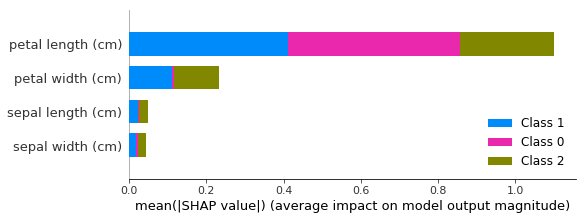

In [20]:
# shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


### Use shap.explainer

One can not only use kernel shap but also other explainers. In this part we try shap.explainer:

In [21]:
f = lambda x: model.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))

explainer = shap.Explainer(f, med)
shap_values = explainer(X_test)

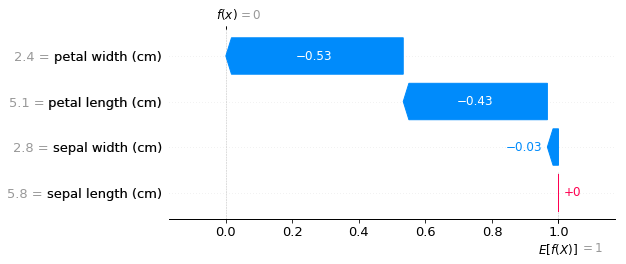

In [22]:
shap.plots.waterfall(shap_values[0])

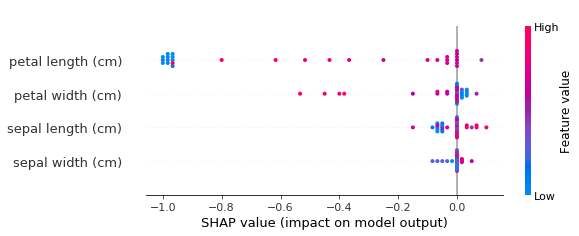

In [23]:
shap.plots.beeswarm(shap_values)

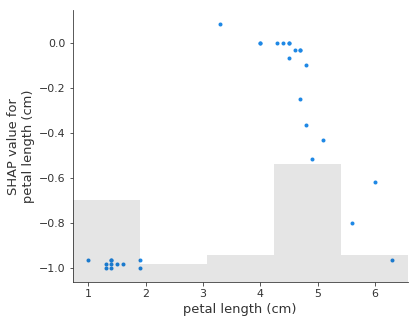

In [24]:
shap.plots.scatter(shap_values[:,"petal length (cm)"])

### Sentiment analysis
Classify the "positive" and "negative" sentiment of IMDB reviews.  

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
shap.initjs()

**Load the dataset of IMDB reviews** 

In [26]:
corpus,y = shap.datasets.imdb()
corpus_train, corpus_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=7)
corpus_train, corpus_test, y_train, y_test = corpus_train[:10000],corpus_test[:500],y_train[:10000],y_test[:500]

**Preprocess and Create training and testing dataset**

In [27]:
vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(corpus_train).toarray() 
X_test = vectorizer.transform(corpus_test).toarray()

**Define a logistic classification model.** 

In [28]:
model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

**Build explainer**  
Please fill in your answer in the following code block.

In [ ]:
###### Please fill in your answer here ######
explainer = shap.Explainer(...)
shap_values = ...
###### END ######

In [29]:
###### Answer ######
explainer = shap.Explainer(model, X_train, feature_names=vectorizer.get_feature_names())
shap_values = explainer(X_test)
###### END ######

Please plot 10 features with beeswarm 

In [ ]:
shap.plots.beeswarm(...)

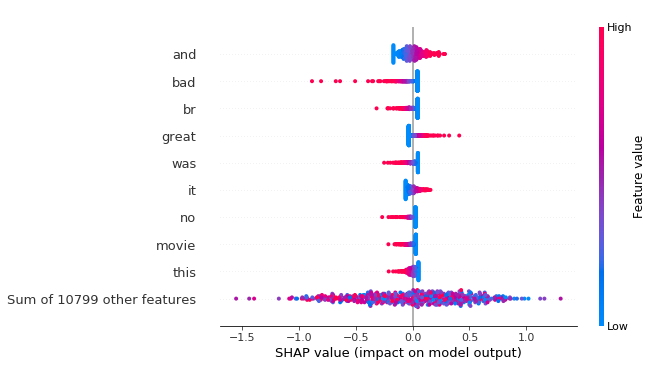

In [30]:
###### Answer ######
shap.plots.beeswarm(shap_values ,max_display=10)
###### END ######

In [31]:
ind = 10
print("Positive" if y_test[ind] else "Negative", "Review:")
print(corpus_test[ind])

Positive Review:
I would never have thought I would almost cry viewing one minute excerpted from a 1920 black and white movie without sound. Thanks to Martin Scorsese I did (the movie was from F. Borzage). You will start to understand (if it's not already the case), what makes a good movie.



Please plot the force plot for the review, corpus_test[10].

In [ ]:
shap.plots.force(...)

In [32]:
###### Answer ######
shap.plots.force(shap_values[ind])
###### END ######

Please also try the bar plot

In [ ]:
shap.plots.bar(...)

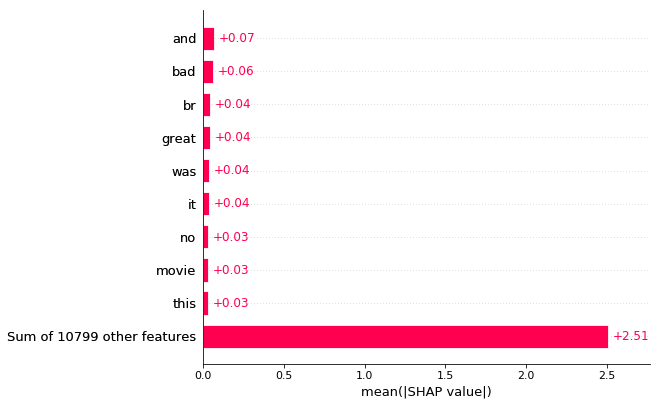

In [33]:
###### Answer ######
shap.plots.bar(explainer(X_test),max_display=10)
###### End ######

# END